<a href="https://colab.research.google.com/github/Lohith288/Major-project/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Getting the image path***

In [ ]:
# initializing path
data_dir = Path('/content/drive/MyDrive/CT KIDNEY DATASET')
train_dir = data_dir

In [ ]:
# Get the path to the normal and pneumonia sub-directories
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [ ]:
# Getting the list of all the images
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')

In [ ]:
# An empty list for inserting data into this list in (image_path, Label) format
train_data = []

In [ ]:
# Labeling the Cyst case as 0
for img in Cyst_Cases:
    train_data.append((img, 0))

# Labeling the Normal case as 1
for img in Normal_Cases:
    train_data.append((img, 1))

# Labeling the Stone case as 2
for img in Stone_Cases:
    train_data.append((img, 2))

# Labeling the Tumor case as 3
for img in Tumor_Cases:
    train_data.append((img, 3))

In [ ]:
# Making a data frame using pandas (creating CSV file)
train_data = pd.DataFrame(train_data, columns=['image', 'label'], index=None)

In [ ]:
# Select random data row from the dataframe and show and index it.
train_data = train_data.sample(frac=1.).reset_index(drop=True)
train_data.head()

image  label
0  /content/drive/MyDrive/CT KIDNEY DATASET/Cyst/...      0
1  /content/drive/MyDrive/CT KIDNEY DATASET/Tumor...      3
2  /content/drive/MyDrive/CT KIDNEY DATASET/Norma...      1
3  /content/drive/MyDrive/CT KIDNEY DATASET/Tumor...      3
4  /content/drive/MyDrive/CT KIDNEY DATASET/Norma...      1

***Returns all the unique values of Label in train_data***

In [ ]:
train_data['label'].unique()

array([0, 3, 1, 2])

***Returns number of rows and columns***

In [ ]:
train_data.shape

(12466, 2)

***Getting the count of each class (Normal, Cyst, Tumor, Stone)***

In [ ]:
cases_count = train_data['label'].value_counts()
cases_count

1    5097
0    3709
3    2283
2    1377
Name: label, dtype: int64

***Plotting the Graph***

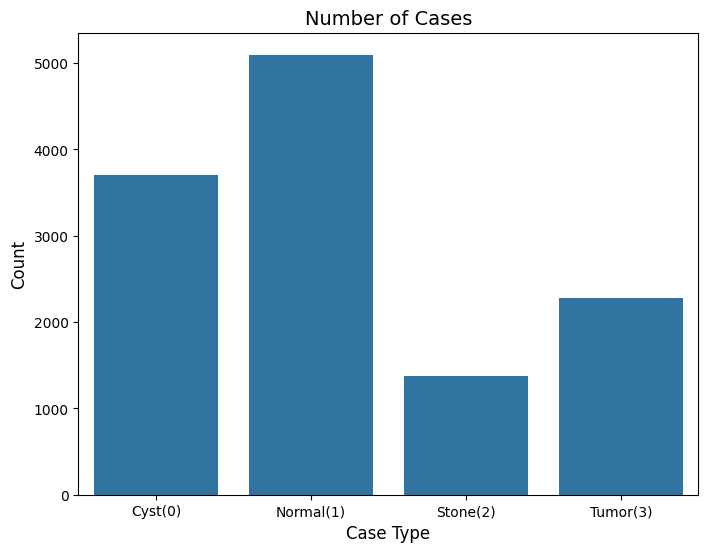

In [ ]:
plt.figure(figsize = (8,6))  # Size of graph
sns.barplot(x = cases_count.index, y = cases_count.values)
plt.title('Number of Cases', fontsize=14)
plt.xlabel('Case Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count.index)),['Cyst(0)', 'Normal(1)','Stone(2)','Tumor(3)'])
plt.show()

***Getting few samples for both the classes***

In [ ]:
# Gets 5 data from each cases
Cyst_Samples = (train_data[train_data['label'] == 0]['image'].iloc[:5]).tolist()
Normal_Samples = (train_data[train_data['label'] == 1]['image'].iloc[:5]).tolist()
Stone_Samples = (train_data[train_data['label'] == 2]['image'].iloc[:5]).tolist()
Tumor_Samples = (train_data[train_data['label'] == 3]['image'].iloc[:5]).tolist()

# Combining data in one variable
samples = Cyst_Samples + Normal_Samples + Stone_Samples + Tumor_Samples

del Cyst_Samples, Normal_Samples, Stone_Samples, Tumor_Samples



***Displaying the picture***

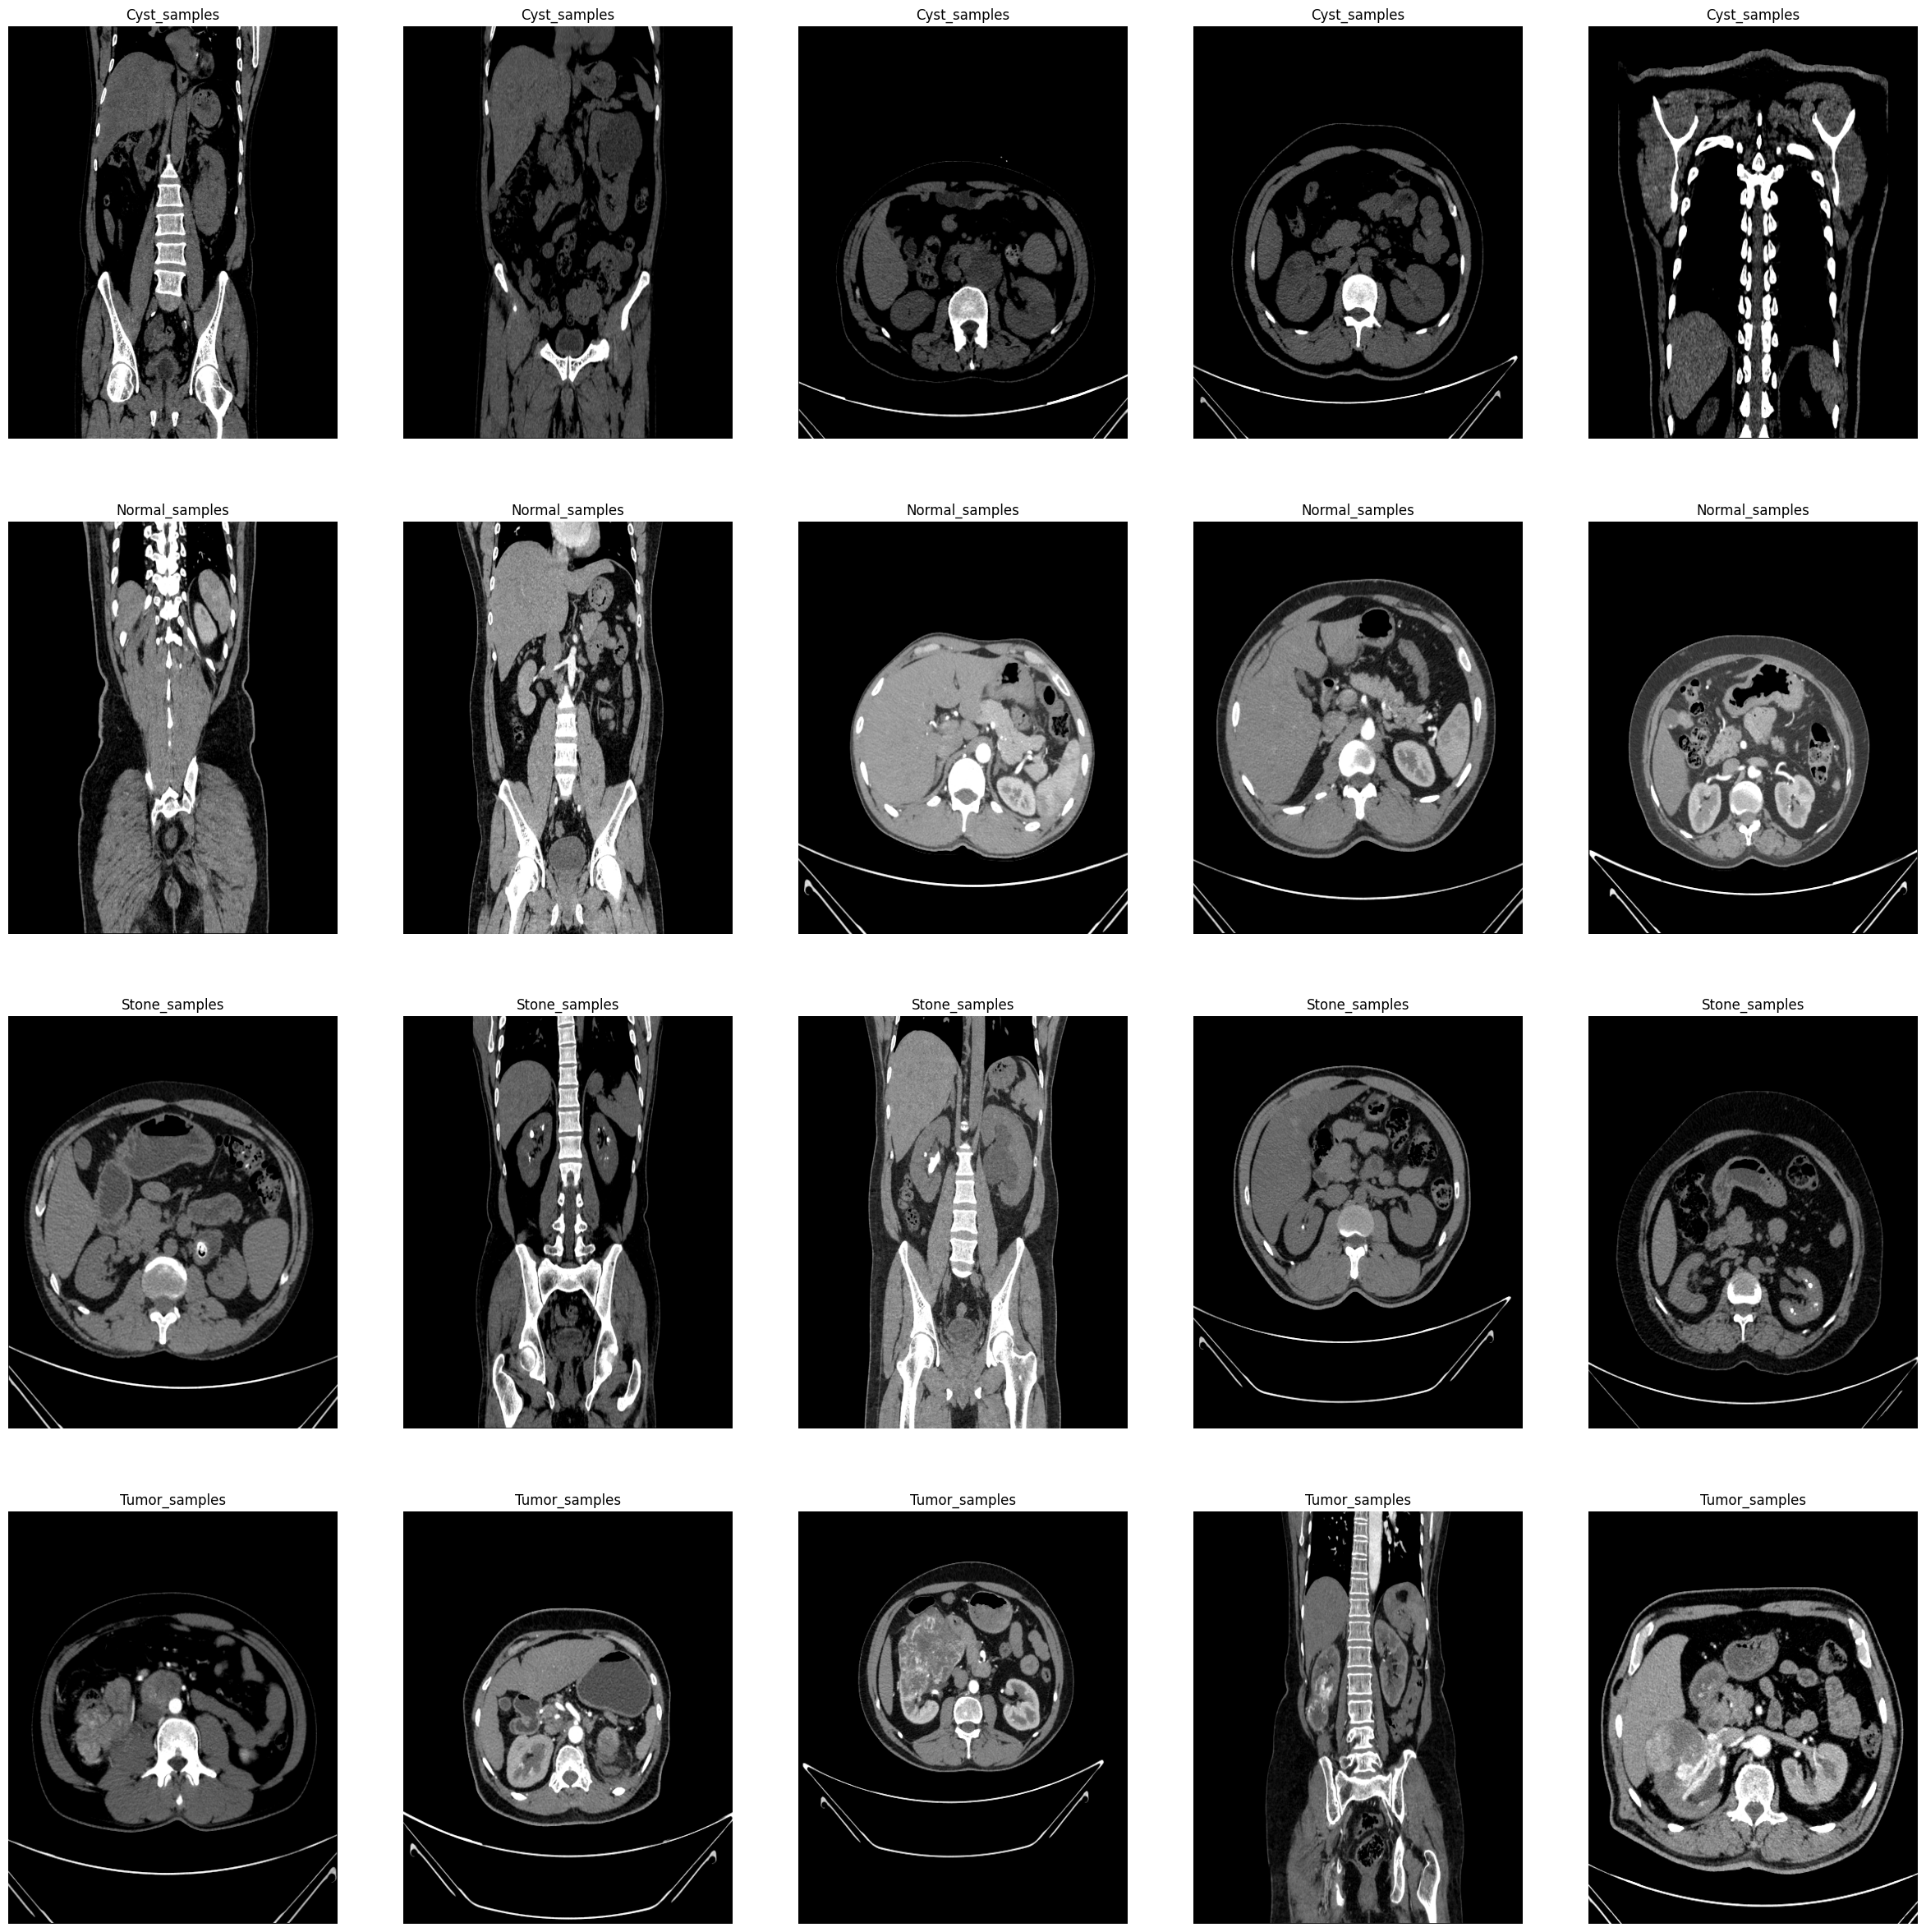

In [ ]:
f, ax = plt.subplots(4, 5,figsize=(30,30)) # Initilizing the graph where image is to be display

for i in range(20):
    img = imread(samples[i]) # reading the image
    ax[i//5, i%5].imshow(img, cmap='gray') # displaying the image

    # putting title in the images
    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")

    # removing the scales in the graph
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')

plt.show()


***Get the path to the normal and pneumonia sub-directories***

In [ ]:
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

***Getting the list of all the images***

In [ ]:
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')
train_data = []
train_labels = []

# ***Data pre processing***

In [ ]:
for img in Cyst_Cases:
    img = cv2.imread(str(img)) # Loading image
    img = cv2.resize(img, (28,28)) # resizing image
    if img.shape[2] == 1: # Number of channel in the dimension.
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Changing image color
    img = np.array(img) # creating a numpy array
    img = img/255  # Normalization
    label = 'Cyst'
    train_data.append(img)
    train_labels.append(label)

In [ ]:
for img in Normal_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img,(28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = 'Normal'
    train_data.append(img)
    train_labels.append(label)

In [ ]:
for img in Stone_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img,img,img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Stone"
    train_data.append(img)
    train_labels.append(label)

In [ ]:
for img in Tumor_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Tumor"
    train_data.append(img)
    train_labels.append(label)

In [ ]:
train_data1 = np.array(train_data) # train_data or train_data1 is a 4D array from 3D image Array
train_labels1 = np.array(train_labels)
print('Total number of validation example: ', train_data1.shape)
print('Total number of Labels : ', train_labels1.shape)

Total number of validation example:  (12466, 28, 28, 3)
Total number of Labels :  (12466,)


In [ ]:
train_data1[1]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.09803922, 0.09803922, 0.09803922],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
train_labels1 = pd.DataFrame(train_labels1, columns = ['label'],index=None)
train_labels1

label
0       Cyst
1       Cyst
2       Cyst
3       Cyst
4       Cyst
...      ...
12461  Tumor
12462  Tumor
12463  Tumor
12464  Tumor
12465  Tumor

[12466 rows x 1 columns]

In [ ]:
train_labels1['label'].unique()

array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [ ]:
train_labels1['label'] = train_labels1['label'].map({'Cyst':0,'Normal':1,'Stone':2,'Tumor':3})

In [ ]:
train_labels1

label
0          0
1          0
2          0
3          0
4          0
...      ...
12461      3
12462      3
12463      3
12464      3
12465      3

[12466 rows x 1 columns]

In [ ]:
print(train_data1.shape)
print(train_labels1.shape)

(12466, 28, 28, 3)
(12466, 1)


In [ ]:
train_labels1.isnull().sum() # Checking for the missing(NULL) value in the labels1

label    0
dtype: int64

# ***Image data set Imbalance***

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() # Initilizing The SMOTE class
train_rows = len(train_data1) # getting total number or rows
train_data1 = train_data1.reshape(train_rows,-1)  # Converting 4D array to 2D Array
train_data2, train_labels2 = smote.fit_resample(train_data1,train_labels1) # Balancing Image Dataset using SMOTE

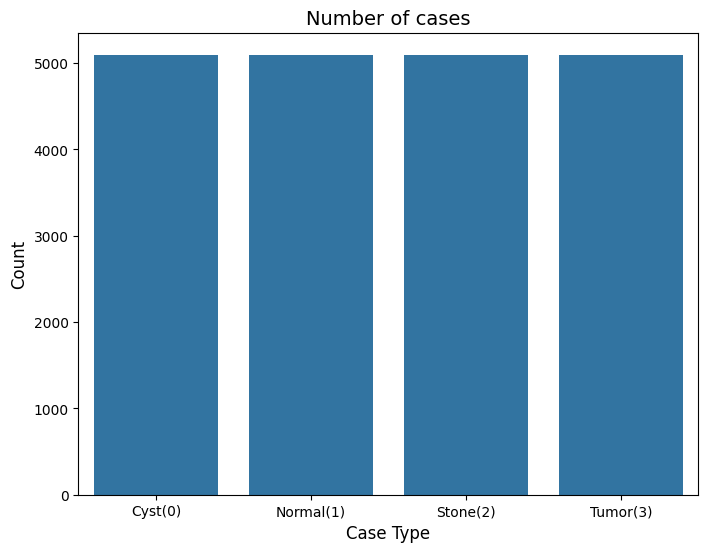

In [ ]:
cases_count1 = train_labels2['label'].value_counts() # Counting values of diffrent image

#Plotting Graph for Label values
plt.figure(figsize=(8,6)) # Setting size of graph
sns.barplot(x=cases_count1.index, y=cases_count1.values)
plt.title('Number of cases', fontsize = 14)
plt.xlabel('Case Type',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count1.index)), ['Cyst(0)', 'Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [ ]:
train_data2.shape

(20388, 2352)

In [ ]:
train_data2 = train_data2.reshape(-1,28,28,3) # Converting 2D array to 4D Array
train_data2.shape


(20388, 28, 28, 3)

In [ ]:
train_data

[array([[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.06666667, 0.06666667, 0.06666667],
         [0.        , 0.        , 0.     

***Splitting the Dataset For training and testing and Validating using sklearn : train_test_split***

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.20, random_state=42)

# Splitting the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)


In [ ]:
total_samples = len(train_data2)
train_percentage = len(X_train) / total_samples * 100
test_percentage = len(X_test) / total_samples * 100
val_percentage = len(X_val) / total_samples * 100

print(f"Train set percentage: {train_percentage:.2f}%")
print(f"Test set percentage: {test_percentage:.2f}%")
print(f"Validation set percentage: {val_percentage:.2f}%")


Train set percentage: 72.00%
Test set percentage: 20.00%
Validation set percentage: 8.00%


In [ ]:
print("Training Data X : ",X_train.shape)
print("Testing Data X : ",X_test.shape)
print("Training Data y : ",y_train.shape)
print("Testing Data y : ",y_test.shape)
print("Validating Data X : ",X_val.shape)
print("Validating Data y",y_val.shape)
print("Image Size : ",X_train[0].shape)

Training Data X :  (14679, 28, 28, 3)
Testing Data X :  (4078, 28, 28, 3)
Training Data y :  (14679, 1)
Testing Data y :  (4078, 1)
Validating Data X :  (1631, 28, 28, 3)
Validating Data y (1631, 1)
Image Size :  (28, 28, 3)


***SVM***

In [103]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined

# Reshape y_train and y_test using ravel()
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
X_train = X_train.reshape(-1, 28 * 28 * 3)
X_test = X_test.reshape(-1, 28 * 28 * 3)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred, average='micro')
print("Sensitivity (Recall):", sensitivity)

# Specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity)

# Precision
precision = precision_score(y_test, y_pred, average='micro')
print("Precision:", precision)

# Negative Predictive Value
npv = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0])
print("Negative Predictive Value:", npv)

# False Positive Rate
fpr = 1 - specificity
print("False Positive Rate:", fpr)

# False Discovery Rate
fdr = 1 - precision
print("False Discovery Rate:", fdr)

# False Negative Rate
fnr = 1 - sensitivity
print("False Negative Rate:", fnr)

# F1 Score
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score:", f1)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)


Confusion Matrix:
[[ 995    0    0    0]
 [   0 1026    0    0]
 [   0    0 1085    0]
 [   0    0    0  972]]
Accuracy: 100.0
Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0
Negative Predictive Value: 1.0
False Positive Rate: 0.0
False Discovery Rate: 0.0
False Negative Rate: 0.0
F1 Score: 1.0
Matthews Correlation Coefficient: 1.0


***KNN***

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Assume you have a function to load your image data and labels
def load_data():
    # Load the data
    X_train_val, X_test, y_train_val, y_test = train_test_split(train_data2, train_labels2, test_size=0.20, random_state=42)

    # Split the rest into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.10, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Load the data
X_train, X_val, X_test, y_train, y_val, y_test = load_data()

# Convert y_train, y_val, and y_test to 1D arrays before splitting
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_test = np.ravel(y_test)
X_train = X_train.reshape(-1, 28 * 28 * 3)
X_val = X_val.reshape(-1, 28 * 28 * 3)
X_test = X_test.reshape(-1, 28 * 28 * 3)

# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred_test = knn.predict(X_test)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred_test,average='micro')
print("Sensitivity (Recall):", sensitivity)

# Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)

# Precision
precision = precision_score(y_test, y_pred_test,average='micro')
print("Precision:", precision)

# Negative Predictive Value
npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
print("Negative Predictive Value:", npv)

# False Positive Rate
fpr = 1 - specificity
print("False Positive Rate:", fpr)

# False Discovery Rate
fdr = 1 - precision
print("False Discovery Rate:", fdr)

# False Negative Rate
fnr = 1 - sensitivity
print("False Negative Rate:", fnr)

# F1 Score
f1 = f1_score(y_test, y_pred_test,average='micro')
print("F1 Score:", f1)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_test)
print("Matthews Correlation Coefficient:", mcc)


Confusion Matrix:
 [[ 995    0    0    0]
 [   0 1026    0    0]
 [   0    0 1085    0]
 [   0    0    1  971]]
Accuracy: 99.98%
Sensitivity (Recall): 0.9997547817557626
Specificity: 1.0
Precision: 0.9997547817557626
Negative Predictive Value: 1.0
False Positive Rate: 0.0
False Discovery Rate: 0.0002452182442373996
False Negative Rate: 0.0002452182442373996
F1 Score: 0.9997547817557626
Matthews Correlation Coefficient: 0.9996729310516683


***Random forest classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(train_data2, train_labels2, test_size=0.10, random_state=42)

# Convert y_train, y_val, and y_test to 1D arrays using ravel()
y_train = y_train.to_numpy().ravel()
y_val = y_val.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()
X_train = X_train.reshape(-1, 28 * 28 * 3)
X_val = X_val.reshape(-1, 28 * 28 * 3)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100)


# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = rf.predict(X_val)

# Confusion Matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix (Validation):\n", cm_val)

# Accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy (Validation): {:.2f}%".format(accuracy_val * 100))

# Sensitivity (Recall)
sensitivity_val = recall_score(y_val, y_pred_val,average='micro')
print("Sensitivity (Recall) (Validation):", sensitivity_val)

# Specificity
specificity_val = cm_val[0, 0] / (cm_val[0, 0] + cm_val[0, 1])
print("Specificity (Validation):", specificity_val)

# Precision
precision_val = precision_score(y_val, y_pred_val,average='micro')
print("Precision (Validation):", precision_val)

# Negative Predictive Value
npv_val = cm_val[0, 0] / (cm_val[0, 0] + cm_val[1, 0])
print("Negative Predictive Value (Validation):", npv_val)

# False Positive Rate
fpr_val = 1 - specificity_val
print("False Positive Rate (Validation):", fpr_val)

# False Discovery Rate
fdr_val = 1 - precision_val
print("False Discovery Rate (Validation):", fdr_val)

# False Negative Rate
fnr_val = 1 - sensitivity_val
print("False Negative Rate (Validation):", fnr_val)

# F1 Score
f1_val = f1_score(y_val, y_pred_val,average='micro')
print("F1 Score (Validation):", f1_val)

# Matthews Correlation Coefficient
mcc_val = matthews_corrcoef(y_val, y_pred_val)
print("Matthews Correlation Coefficient (Validation):", mcc_val)


Confusion Matrix (Validation):
 [[499   0   0   0]
 [  0 512   0   0]
 [  0   0 533   0]
 [  0   0   1 494]]
Accuracy (Validation): 99.95%
Sensitivity (Recall) (Validation): 0.9995095635115253
Specificity (Validation): 1.0
Precision (Validation): 0.9995095635115253
Negative Predictive Value (Validation): 1.0
False Positive Rate (Validation): 0.0
False Discovery Rate (Validation): 0.0004904364884746881
False Negative Rate (Validation): 0.0004904364884746881
F1 Score (Validation): 0.9995095635115253
Matthews Correlation Coefficient (Validation): 0.9993462130376324


***Decision Tree Classifier***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Assuming X_train, y_train, X_test, y_test are already defined

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
X_test = X_test.reshape(-1, 28 * 28 * 3)
y_pred_dt = dt_classifier.predict(X_test)


# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel().reshape(4, 4)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Sensitivity (Recall)
sensitivity_dt = recall_score(y_test, y_pred_dt,average='micro')

# Specificity
specificity_dt = tn_dt / (tn_dt + fp_dt)

# Precision
precision_dt = precision_score(y_test, y_pred_dt,average='micro')

# Negative Predictive Value
npv_dt = tn_dt / (tn_dt + fn_dt)

# False Positive Rate
fpr_dt = fp_dt / (fp_dt + tn_dt)

# False Discovery Rate
fdr_dt = fp_dt / (fp_dt + tp_dt)

# False Negative Rate
fnr_dt = fn_dt / (fn_dt + tp_dt)

# F1 Score
f1_dt = f1_score(y_test, y_pred_dt,average='micro')

# Matthews Correlation Coefficient
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)

print("Decision Tree Classifier:")
print("Confusion Matrix:\n", cm_dt)
print("Accuracy: {:.2f}%".format(accuracy_dt * 100))
print("Sensitivity (Recall): {:.2f}".format(sensitivity_dt))
print("Specificity: {:.2f}".format(specificity_dt[0]))
print("Precision: {:.2f}".format(precision_dt))
print("Negative Predictive Value: {:.2f}".format(npv_dt[0]))
print("False Positive Rate: {:.2f}".format(fpr_dt[0]))
print("False Discovery Rate: {:.2f}".format(fdr_dt[0]))
print("False Negative Rate: {:.2f}".format(fnr_dt[0]))
print("F1 Score: {:.2f}".format(f1_dt))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc_dt))


Decision Tree Classifier:
Confusion Matrix:
 [[ 983    5    2    5]
 [   0 1011    5   10]
 [   2    3 1077    3]
 [   5    3    1  963]]
Accuracy: 98.92%
Sensitivity (Recall): 0.99
Specificity: 1.00
Precision: 0.99
Negative Predictive Value: 1.00
False Positive Rate: 0.00
False Discovery Rate: 0.00
False Negative Rate: 0.29
F1 Score: 0.99
Matthews Correlation Coefficient: 0.99


***Linear Discriminant Analysis***

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create an LDA object
lda = LinearDiscriminantAnalysis()

# Fit the LDA to the training data
lda.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = lda.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_pred,average='micro')

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate precision
precision = precision_score(y_test, y_pred,average='micro')

# Calculate negative predictive value
npv = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0])

# Calculate false positive rate
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])

# Calculate false discovery rate
fdr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])

# Calculate false negative rate
fnr = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1])

# Calculate F1 score
f1 = f1_score(y_test, y_pred,average='micro')

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Sensitivity (Recall): {:.2f}".format(sensitivity))
print("Specificity: {:.2f}".format(specificity))
print("Precision: {:.2f}".format(precision))
print("Negative Predictive Value: {:.2f}".format(npv))
print("False Positive Rate: {:.2f}".format(fpr))
print("False Discovery Rate: {:.2f}".format(fdr))
print("False Negative Rate: {:.2f}".format(fnr))
print("F1 Score: {:.2f}".format(f1))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))


Confusion Matrix:
 [[ 991    0    1    3]
 [   2 1019    0    5]
 [   0    0 1085    0]
 [   0    2    1  969]]
Accuracy: 99.66%
Sensitivity (Recall): 1.00
Specificity: 1.00
Precision: 1.00
Negative Predictive Value: 1.00
False Positive Rate: 0.00
False Discovery Rate: 0.00
False Negative Rate: 0.00
F1 Score: 1.00
Matthews Correlation Coefficient: 1.00


***XG BOOST***

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Function to calculate specificity from confusion matrix
def specificity(conf_matrix):
    return conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1] + conf_matrix[1, 0])

# Function to calculate negative predictive value from confusion matrix
def negative_predictive_value(conf_matrix):
    return conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Function to calculate false positive rate from confusion matrix
def false_positive_rate(conf_matrix):
    return conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])

# Function to calculate false discovery rate from confusion matrix
def false_discovery_rate(conf_matrix):
    return conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])

# Function to calculate false negative rate from confusion matrix
def false_negative_rate(conf_matrix):
    return conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1])

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Label encoding if needed
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=len(np.unique(y_train_encoded)),
    random_state=42
)

xgb_classifier.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)

# Calculate sensitivity (recall)
sensitivity_xgb = recall_score(y_test_encoded, y_pred_xgb, average='weighted')

# Calculate specificity
specificity_xgb = specificity(conf_matrix_xgb)

# Calculate precision
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, average='weighted')

# Calculate negative predictive value
npv_xgb = negative_predictive_value(conf_matrix_xgb)

# Calculate false positive rate
fpr_xgb = false_positive_rate(conf_matrix_xgb)

# Calculate false discovery rate
fdr_xgb = false_discovery_rate(conf_matrix_xgb)

# Calculate false negative rate
fnr_xgb = false_negative_rate(conf_matrix_xgb)

# Calculate F1 score
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')

# Calculate Matthews correlation coefficient
mcc_xgb = matthews_corrcoef(y_test_encoded, y_pred_xgb)

# Print the results
print("Gradient Boosting with XGBoost:")
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Accuracy: {:.2f}%".format(accuracy_xgb * 100))
print("Sensitivity (Recall): {:.2f}".format(sensitivity_xgb))
print("Specificity: {:.2f}".format(specificity_xgb))
print("Precision: {:.2f}".format(precision_xgb))
print("Negative Predictive Value: {:.2f}".format(npv_xgb))
print("False Positive Rate: {:.2f}".format(fpr_xgb))
print("False Discovery Rate: {:.2f}".format(fdr_xgb))
print("False Negative Rate: {:.2f}".format(fnr_xgb))
print("F1 Score: {:.2f}".format(f1_xgb))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc_xgb))


Gradient Boosting with XGBoost:
Confusion Matrix:
 [[ 994    0    1    0]
 [   5 1016    2    3]
 [   4    0 1081    0]
 [   3    0    0  969]]
Accuracy: 99.56%
Sensitivity (Recall): 1.00
Specificity: 0.99
Precision: 1.00
Negative Predictive Value: 1.00
False Positive Rate: 0.00
False Discovery Rate: 0.00
False Negative Rate: 0.00
F1 Score: 1.00
Matthews Correlation Coefficient: 0.99


***Logistic Regression***

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# Assume you have a function to load your image data and labels
def load_data():
    # Load the data
    X_train_val, X_test, y_train_val, y_test = train_test_split(train_data2, train_labels2, test_size=0.20, random_state=42)

    # Split the rest into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.10, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Load the data
X_train, X_val, X_test, y_train, y_val, y_test = load_data()

# Convert y_train, y_val, and y_test to 1D arrays before splitting
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_test = np.ravel(y_test)

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_flat)
X_val_scaled = scaler.transform(X_val_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Create a logistic regression model with adjustments
logreg = LogisticRegression(max_iter=2000, solver='saga', tol=1e-4, warm_start=True)

# Train the model on the scaled training set
logreg.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled test set
y_pred_test = logreg.predict(X_test_scaled)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred_test, average='micro')
print("Sensitivity (Recall):", sensitivity)

# Precision
precision = precision_score(y_test, y_pred_test, average='micro')
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred_test, average='micro')
print("F1 Score:", f1)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_test)
print("Matthews Correlation Coefficient:", mcc)

# Additional Metrics

# Negative Predictive Value (NPV)
npv = cm[0, 0] / (cm[0, 0] + cm[1, 0]) if (cm[0, 0] + cm[1, 0]) != 0 else 0
print("Negative Predictive Value (NPV):", npv)

# False Positive Rate (FPR)
fpr = cm[0, 1] / (cm[0, 1] + cm[1, 1]) if (cm[0, 1] + cm[1, 1]) != 0 else 0
print("False Positive Rate (FPR):", fpr)

# False Discovery Rate (FDR)
fdr = cm[0, 1] / (cm[0, 1] + cm[0, 0]) if (cm[0, 1] + cm[0, 0]) != 0 else 0
print("False Discovery Rate (FDR):", fdr)

# False Negative Rate (FNR)
fnr = cm[1, 0] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) != 0 else 0
print("False Negative Rate (FNR):", fnr)


Confusion Matrix:
 [[ 995    0    0    0]
 [   1 1025    0    0]
 [   0    0 1085    0]
 [   0    0    1  971]]
Accuracy: 99.95%
Sensitivity (Recall): 0.9995095635115253
Precision: 0.9995095635115253
F1 Score: 0.9995095635115253
Matthews Correlation Coefficient: 0.9993458636167181
Negative Predictive Value (NPV): 0.998995983935743
False Positive Rate (FPR): 0.0
False Discovery Rate (FDR): 0.0
False Negative Rate (FNR): 0.0009746588693957114


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Assume you have a function to load your image data and labels
def load_data():
    # Load the data
    X_train_val, X_test, y_train_val, y_test = train_test_split(train_data2, train_labels2, test_size=0.20, random_state=42)

    # Split the rest into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.10, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Load the data
X_train, X_val, X_test, y_train, y_val, y_test = load_data()

# Convert y_train, y_val, and y_test to 1D arrays before splitting
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_test = np.ravel(y_test)
X_train = X_train.reshape((14679, 28 * 28 * 3))
X_test = X_test.reshape((4078, 28 * 28 * 3))

# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred_test = knn.predict(X_test)

model=y_pred_test


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred_test,average='micro')
print("Sensitivity (Recall):", sensitivity)

# Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)

# Precision
precision = precision_score(y_test, y_pred_test,average='micro')
print("Precision:", precision)

# Negative Predictive Value
npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
print("Negative Predictive Value:", npv)

# False Positive Rate
fpr = 1 - specificity
print("False Positive Rate:", fpr)

# False Discovery Rate
fdr = 1 - precision
print("False Discovery Rate:", fdr)

# False Negative Rate
fnr = 1 - sensitivity
print("False Negative Rate:", fnr)

# F1 Score
f1 = f1_score(y_test, y_pred_test,average='micro')
print("F1 Score:", f1)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_test)
print("Matthews Correlation Coefficient:", mcc)


Confusion Matrix:
 [[ 995    0    0    0]
 [   0 1026    0    0]
 [   0    0 1085    0]
 [   0    0    1  971]]
Accuracy: 99.98%
Sensitivity (Recall): 0.9997547817557626
Specificity: 1.0
Precision: 0.9997547817557626
Negative Predictive Value: 1.0
False Positive Rate: 0.0
False Discovery Rate: 0.0002452182442373996
False Negative Rate: 0.0002452182442373996
F1 Score: 0.9997547817557626
Matthews Correlation Coefficient: 0.9996729310516683


In [90]:
import tensorflow as tf
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=30,
                    horizontal_flip=True)

In [91]:
# Making Model

from tensorflow.keras import layers,models

model = models.Sequential([
        layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten()

])
model.add(layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 4)                

Epoch 1/3
459/459 [==============================] - 14s 29ms/step - loss: 0.6375 - accuracy: 0.7550 - val_loss: 0.2272 - val_accuracy: 0.9326
Epoch 2/3
459/459 [==============================] - 13s 29ms/step - loss: 0.1226 - accuracy: 0.9708 - val_loss: 0.0773 - val_accuracy: 0.9816
Epoch 3/3
459/459 [==============================] - 13s 29ms/step - loss: 0.0364 - accuracy: 0.9940 - val_loss: 0.0194 - val_accuracy: 0.9988


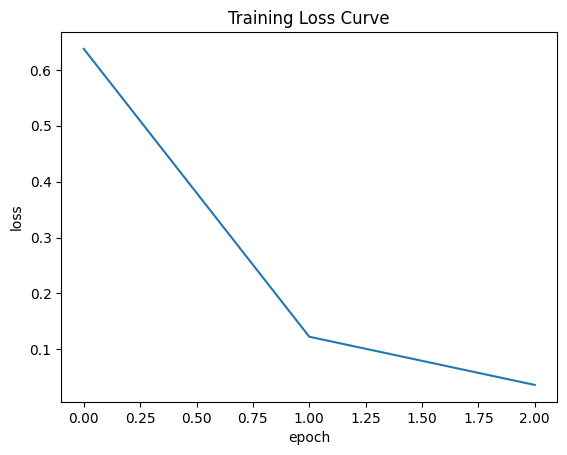

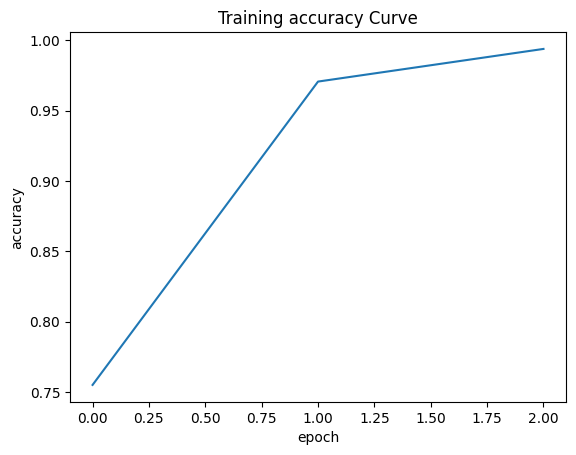

In [92]:
# Traning Model

#Compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Reshape the training data
X_train_reshaped = X_train.reshape((X_train.shape[0], 28, 28, 3))

# Train the model with the reshaped training data
history = model.fit(X_train_reshaped, np.array(y_train), epochs=3, validation_data=(np.array(X_val), np.array(y_val)))

# Graph for Loss
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

# Graph for Accuracy
plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training accuracy Curve")
plt.show()

In [93]:
X_test_reshaped = X_test.reshape((X_test.shape[0], 28, 28, 3))
a = model.predict(X_test_reshaped)
print(a)


128/128 [==============================] - 2s 12ms/step
[[6.28622365e-05 5.67166917e-02 9.40449595e-01 2.77093239e-03]
 [1.33021388e-07 1.74433365e-03 2.48435408e-05 9.98230696e-01]
 [1.28057745e-05 2.92871002e-04 1.01414094e-04 9.99592960e-01]
 ...
 [9.99937057e-01 7.64500214e-07 5.38927816e-05 8.31643320e-06]
 [5.73428083e-10 9.99839664e-01 1.06162508e-04 5.41196459e-05]
 [1.20009076e-07 1.01671629e-02 9.89830554e-01 2.06899108e-06]]


In [94]:
# Sparse to Dense
b = []
for i in a:
    if i[0] > i[1] and i[0] > i[2] and i[0] > i[3]:
        b.append(0)
    elif i[1] > i[0] and i[1] > i[2] and i[1] > i[3]:
        b.append(1)
    elif i[2] > i[1] and i[2] > i[0] and i[2] > i[3]:
        b.append(2)
    else:
        b.append(3)
print(b)

[2, 3, 3, 2, 1, 1, 1, 2, 3, 1, 3, 2, 2, 0, 1, 1, 2, 2, 0, 3, 3, 1, 2, 0, 3, 2, 2, 0, 3, 3, 2, 3, 3, 0, 0, 2, 0, 3, 2, 1, 0, 3, 2, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 2, 3, 2, 3, 1, 1, 1, 2, 1, 1, 0, 3, 0, 3, 2, 0, 2, 0, 0, 3, 0, 3, 1, 3, 3, 2, 1, 1, 1, 3, 0, 0, 2, 2, 2, 3, 0, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 3, 2, 2, 3, 0, 3, 1, 1, 1, 0, 1, 1, 3, 2, 1, 2, 3, 2, 0, 0, 3, 1, 0, 3, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 3, 1, 2, 1, 2, 1, 2, 1, 3, 2, 2, 2, 3, 3, 0, 0, 0, 3, 2, 0, 2, 0, 2, 2, 1, 1, 2, 3, 2, 3, 2, 0, 3, 3, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 3, 0, 3, 3, 1, 3, 2, 2, 2, 2, 0, 3, 2, 1, 3, 3, 1, 3, 0, 3, 1, 3, 3, 1, 0, 1, 3, 2, 0, 1, 2, 1, 3, 0, 1, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 1, 0, 2, 2, 3, 2, 0, 1, 3, 1, 3, 2, 3, 3, 2, 2, 0, 3, 3, 2, 3, 0, 1, 2, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 3, 0, 2, 2, 3, 3, 1, 2, 0, 0, 3, 2, 0, 2, 0, 0, 3, 1, 1, 2, 0, 3, 1, 1, 3, 2, 2, 0, 1, 0, 3, 3, 1, 3, 0, 1, 0, 0, 0, 2, 0, 3, 2, 1, 3, 3, 1, 3, 1, 2, 0, 0, 1, 1, 0, 3, 1, 2, 3, 2, 3, 3, 1, 3, 2, 

In [95]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Assuming y_test is the true labels and b is the predicted labels
print("Length of y_test: ", len(y_test))
print("Length of b: ", len(b))

# Check if lengths are consistent
if len(y_test) != len(b):
    print("Error: Lengths of y_test and b are not consistent.")
else:
    print("Accuracy Score: ", accuracy_score(y_test, b))  # Print the accuracy score

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, b)
    print("\n\nConfusion Matrix : \n\n", cm)


Length of y_test:  4078
Length of b:  4078
Accuracy Score:  0.998038254046101


Confusion Matrix : 

 [[ 991    0    4    0]
 [   0 1025    1    0]
 [   0    1 1084    0]
 [   1    1    0  970]]


In [96]:
pic = []
image='/content/drive/MyDrive/CT KIDNEY DATASET/Cyst/Cyst- (1004).jpg'
img = cv2.imread(str(image))

In [97]:
img = cv2.resize(img, (28,28))
pic.append(img)
pic1 = np.array(pic)

In [98]:
a = model.predict(pic1)

1/1 [==============================] - 0s 68ms/step


In [99]:
if a.argmax() == 0:
  print("The detected disease is \"Cyst\"")
elif a.argmax() == 1:
  print("Kidney is \"Normal\" ")
elif  a.argmax() == 2:
  print("The detected disease is \"Stone\"")
else:
  print("The detected disease is \"Tumor\"")

The detected disease is "Cyst"
